In [ ]:
url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
df = pd.read_csv(url)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.shape

(550068, 10)

In [ ]:
#statistical summary
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df.describe(include=object)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [ ]:
#checking null values
df.isnull().sum()/len(df)

,0
User_ID,0.0
Product_ID,0.0
Gender,0.0
Age,0.0
Occupation,0.0
City_Category,0.0
Stay_In_Current_City_Years,0.0
Marital_Status,0.0
Product_Category,0.0
Purchase,0.0


In [ ]:
#checking data type of all attributes
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


#Detecting Outliers For Purchase

In [ ]:
#Range
df['Purchase'].max() - df['Purchase'].min()

23949

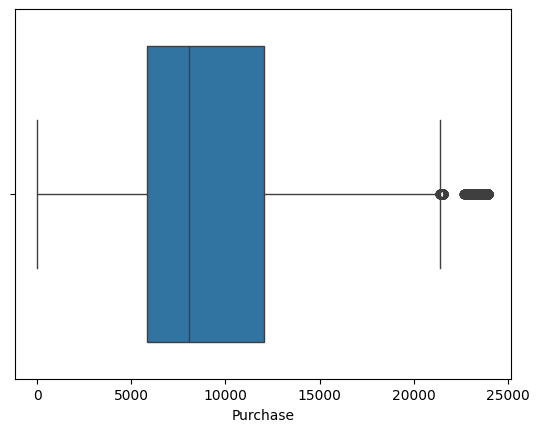

In [ ]:
sns.boxplot(df['Purchase'], orient='h')
plt.show()

In [ ]:
#IQR
iqr_purchase = np.percentile(df['Purchase'], 75) - np.percentile(df['Purchase'], 25)
iqr_purchase

6231.0

In [ ]:
Right_whisker_purchase = np.percentile(df['Purchase'], 75) + 1.25 * iqr_purchase
Right_whisker_purchase

19842.75

In [ ]:
#Outliers
purchse_outliers = df[df['Purchase'] > Right_whisker_purchase]
len(purchse_outliers)

13526

In [ ]:
# 24% are outliers in purchase column
13526 / len(df)

0.02458968709323211

##Clipping the data between 5 percentile & 95 percentile

In [ ]:
lower_bound = np.percentile(df['Purchase'], 5)
upper_bound = np.percentile(df['Purchase'], 95)
df['Purchase'] = np.clip(df['Purchase'], lower_bound, upper_bound)
df['Purchase']

,Purchase
0,8370
1,15200
2,1984
3,1984
4,7969
...,...
550063,1984
550064,1984
550065,1984
550066,1984


#Data Exploration

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


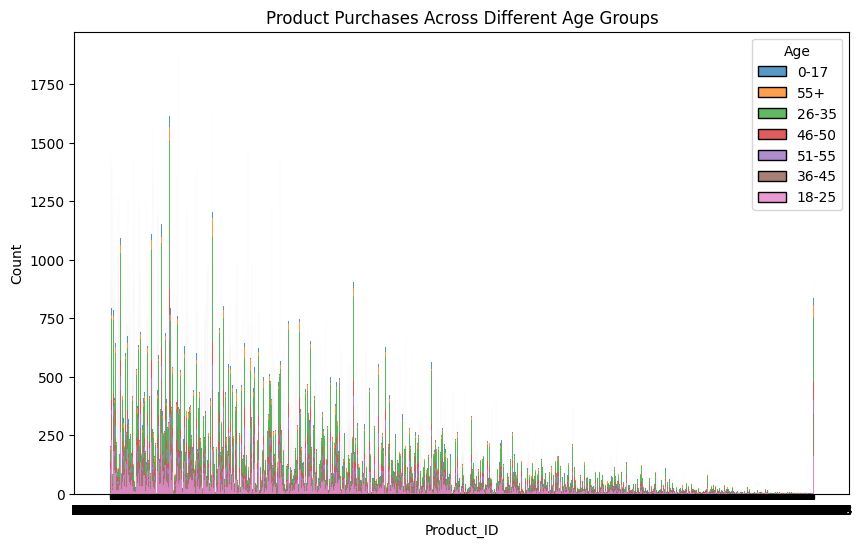

In [ ]:
#What products are different age groups buying?
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Product_ID', hue='Age', multiple="stack", discrete=True)
plt.title("Product Purchases Across Different Age Groups")
plt.show()

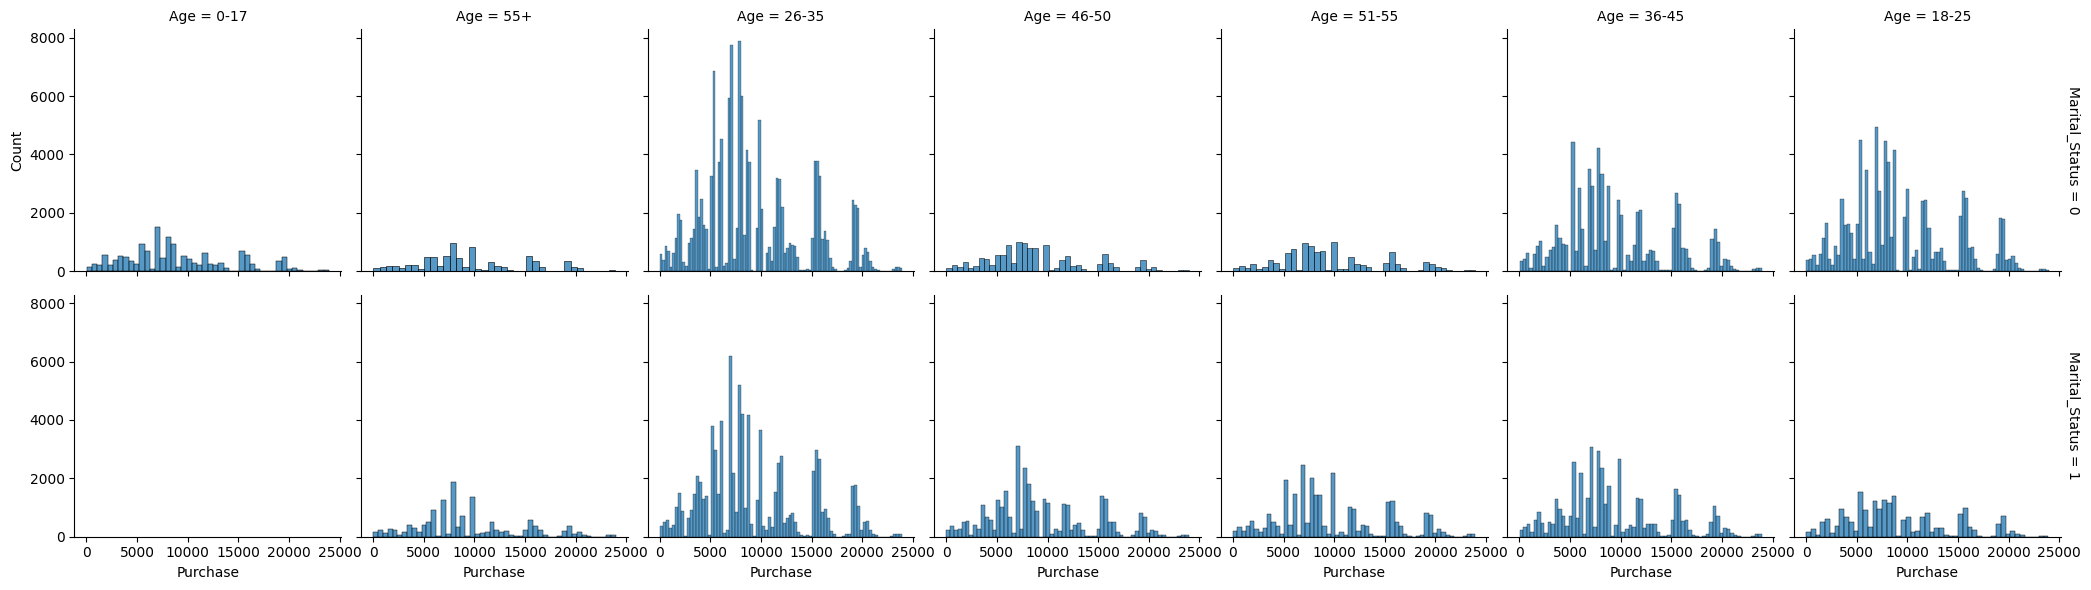

In [ ]:
#Is there a relationship between age, marital status, and the amount spent?
x = sns.FacetGrid(data=df, col="Age", row="Marital_Status", margin_titles=True)
x.map(sns.histplot, "Purchase")
plt.show()

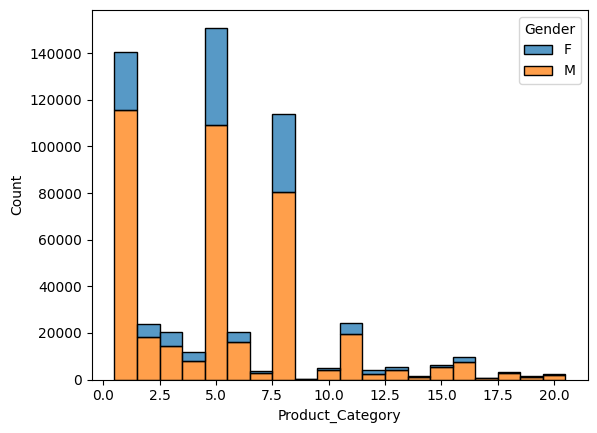

In [ ]:
#Are there preferred product categories for different genders?
sns.histplot(data=df, x='Product_Category', hue='Gender', multiple='stack', discrete=True)
plt.show()

#How does gender affect the amount spent?


In [ ]:
# Calculating mean, standard deviation and sample size for each gender amount spent
gender_group = df.groupby('Gender')['Purchase']

mean = gender_group.mean()
std = gender_group.std()
n = gender_group.count()

print("Mean purchase amount for each gender:")
print(mean)
print("\nStandard Deviation for each gender:")
print(std)
print("\nSample size for each gender:")
print(n)

Mean purchase amount for each gender:
Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

Standard Deviation for each gender:
Gender
F    4767.233289
M    5092.186210
Name: Purchase, dtype: float64

Sample size for each gender:
Gender
F    135809
M    414259
Name: Purchase, dtype: int64


In [ ]:
# Confidence Interval for Female entire dataset
CI_Female = norm.interval(0.95, loc=8734.565765, scale=4767.233289/np.sqrt(135809))
CI_Female

(8709.211546986753, 8759.919983013246)

In [ ]:
# Confidence Interval for Male entire dataset
CI_Male = norm.interval(0.95, loc=9437.526040, scale=5092.186210/np.sqrt(414259))
CI_Male

(9422.01944688963, 9453.032633110372)

In [ ]:
#Bootsrapping using mean
bootstrapped_means_female = []
bootstrapped_means_male = []

#Bootstrapping for Female
for i in range(1000):
  bootstrapped_samples = np.random.choice(df[df['Gender']== 'F']['Purchase'], size=len(df[df['Gender']== 'F']))
  bootstrapped_mean = np.mean(bootstrapped_samples)
  bootstrapped_means_female.append(bootstrapped_mean)

#Bootstrapping for Male
for i in range(1000):
  bootstrapped_samples = np.random.choice(df[df['Gender']== 'M']['Purchase'], size=len(df[df['Gender']== 'M']))
  bootstrapped_mean = np.mean(bootstrapped_samples)
  bootstrapped_means_male.append(bootstrapped_mean)

CI_Female = np.percentile(bootstrapped_means_female, [2.5, 97.5])
CI_Male = np.percentile(bootstrapped_means_male, [2.5, 97.5])

(CI_Female, CI_Male)


(array([8707.64064937, 8759.94075558]), array([9421.68512169, 9453.07451974]))

In [ ]:
#Confidence Interval For Female with 300 sample size
CI_Female = norm.interval(0.95, loc=8734.565765, scale=4767.233289/np.sqrt(300))
CI_Female

(8195.112446915457, 9274.019083084542)

In [ ]:
#Confidence Interval For Female with 3000 sample size
CI_Female = norm.interval(0.95, loc=8734.565765, scale=4767.233289/np.sqrt(3000))
CI_Female

(8563.975647351754, 8905.155882648245)

In [ ]:
#Confidence Interval For Female with 30000 sample size
CI_Female = norm.interval(0.95, loc=8734.565765, scale=4767.233289/np.sqrt(30000))
CI_Female

(8680.620433191545, 8788.511096808454)

In [ ]:
#Confidence Interval For Male with 300 sample size
CI_Male = norm.interval(0.95, loc=9437.526040, scale=5092.186210/np.sqrt(300))
CI_Male

(8861.30151295046, 10013.750567049541)

In [ ]:
#Confidence Interval For Male with 3000 sample size
CI_Male = norm.interval(0.95, loc=9437.526040, scale=5092.186210/np.sqrt(3000))
CI_Male

(9255.307845087016, 9619.744234912985)

In [ ]:
#Confidence Interval For Male with 30000 sample size
CI_Male = norm.interval(0.95, loc=9437.526040, scale=5092.186210/np.sqrt(30000))
CI_Male

(9379.903587295046, 9495.148492704955)

###From the above calculated CLT following are the answers.

---



**1. Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?**

---> Yes, the confidence interval using the entire dataset is wider for females. This is because the sample size for females is smaller, which results in a wider CI.

**2.  How is the width of the confidence interval affected by the sample size?**

---> The width of the confidence interval is inversely proportional to the sample size, meaning that a smaller sample size results in a wider CI, and a larger sample size results in a narrower CI

**3. Do the confidence intervals for different sample sizes overlap?**

---> Yes, the confidence intervals are overlapping. The second and third intervals overlap with the first, and the second interval also overlaps with the third.

**4. How does the sample size affect the shape of the distributions of the means?**

---> Smaller sample sizes result in a wider and more spread out distribution of the sample means, as there is more variability. Larger sample sizes result in a narrower distribution of the sample means, as the estimate of the population mean becomes more precise.



#How does Marital_Status affect the amount spent?


In [ ]:
# Calculating mean, standard deviation and sample size for marital-status affecting amount spent
gender_group = df.groupby('Marital_Status')['Purchase']

mean = gender_group.mean()
std = gender_group.std()
n = gender_group.count()

print("Mean purchase amount for marital-status:")
print(mean)
print("\nStandard Deviation for marital-status:")
print(std)
print("\nSample size for marital-status:")
print(n)

Mean purchase amount for marital-status:
Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

Standard Deviation for marital-status:
Marital_Status
0    5027.347859
1    5016.897378
Name: Purchase, dtype: float64

Sample size for marital-status:
Marital_Status
0    324731
1    225337
Name: Purchase, dtype: int64


In [ ]:
# Confidence Interval for Marital-Staus(0) entire dataset
CI_0 = norm.interval(0.95, loc=9265.907619, scale=5027.347859/np.sqrt(324731))
CI_0

(9248.616418264053, 9283.198819735946)

In [ ]:
# Confidence Interval for Marital-Staus(1) entire dataset
CI_1 = norm.interval(0.95, loc=9261.174574, scale=5016.897378/np.sqrt(225337))
CI_1

(9240.460426973852, 9281.88872102615)

In [ ]:
#Confidence Interval for Marital-Status(0) with 300 sample size
CI_0 = norm.interval(0.95, loc=9265.907619, scale=5027.347859/np.sqrt(300))
CI_0

(8697.020107251721, 9834.795130748278)

In [ ]:
#Confidence Interval for Marital-Status(0) with 3000 sample size
CI_0 = norm.interval(0.95, loc=9265.907619, scale=5027.347859/np.sqrt(3000))
CI_0

(9086.009592044964, 9445.805645955035)

In [ ]:
#Confidence Interval for Marital-Status(0) with 30000 sample size
CI_0 = norm.interval(0.95, loc=9265.907619, scale=5027.347859/np.sqrt(30000))
CI_0

(9209.018867825172, 9322.796370174827)

In [ ]:
# Confidence Interval for Marital-Staus(1) with 300 sample size
CI_1 = norm.interval(0.95, loc=9261.174574, scale=5016.897378/np.sqrt(300))
CI_1

(8693.469623773106, 9828.879524226895)

In [ ]:
# Confidence Interval for Marital-Staus(1) with 3000 sample size
CI_1 = norm.interval(0.95, loc=9261.174574, scale=5016.897378/np.sqrt(3000))
CI_1

(9081.65050583305, 9440.698642166952)

In [ ]:
# Confidence Interval for Marital-Staus(1) with 30000 sample size
CI_1 = norm.interval(0.95, loc=9261.174574, scale=5016.897378/np.sqrt(30000))
CI_1

(9204.404078977312, 9317.94506902269)

### From the above calculated CLT following are the answers.

---



**1. Is the confidence interval computed using the entire dataset wider for one of the marital-status? Why is this the case?**

---> Yes, the confidence interval using the entire dataset is wider for marital-staus(1). This is because the sample size for marital-staus(1) is smaller, which results in a wider CI.

**2. How is the width of the confidence interval affected by the sample size?**

---> The width of the confidence interval is inversely proportional to the sample size, meaning that a smaller sample size results in a wider CI, and a larger sample size results in a narrower CI

**3. Do the confidence intervals for different sample sizes overlap?**

---> Yes, the confidence intervals are overlapping. The second and third intervals overlap with the first, and the second interval also overlaps with the third.

**4. How does the sample size affect the shape of the distributions of the means?**

---> Smaller sample sizes result in a wider and more spread out distribution of the sample means, as there is more variability. Larger sample sizes result in a narrower distribution of the sample means, as the estimate of the population mean becomes more precise.

#How does Age affect the amount spent?


In [ ]:
# Calculating mean, standard deviation and sample size for Age affecting amount spent
gender_group = df.groupby('Age')['Purchase']

mean = gender_group.mean()
std = gender_group.std()
n = gender_group.count()

print("Mean purchase amount for Age:")
print(mean)
print("\nStandard Deviation for Age:")
print(std)
print("\nSample size for Age:")
print(n)

Mean purchase amount for Age:
Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

Standard Deviation for Age:
Age
0-17     5111.114046
18-25    5034.321997
26-35    5010.527303
36-45    5022.923879
46-50    4967.216367
51-55    5087.368080
55+      5011.493996
Name: Purchase, dtype: float64

Sample size for Age:
Age
0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
Name: Purchase, dtype: int64


In [ ]:
# Confidence Interval for Age entire dataset
CI_Age[age_group] = norm.interval(0.95, loc=mean[age_group], scale=std[age_group]/np.sqrt(n[age_group]))
CI_Age

{'0-17': (8875.628002603069, 8991.301277396931),
 '18-25': (9112.695936472492, 9226.631275527508),
 '26-35': (9195.992220837226, 9309.389045162774),
 '36-45': (9274.512004949414, 9388.189385050584),
 '46-50': (9152.417385208713, 9264.834008791286),
 '51-55': (9477.240099571278, 9592.375962428723),
 '55+': (9269.298833963025, 9403.262084036975)}

In [ ]:
bootstrapped_means = {}

# Iterate over each age group
for age_group in df['Age'].unique():
    bootstrapped_samples = []
    age_group_data = df[df['Age'] == age_group]['Purchase']

    # Bootstrap samples
    for _ in range(1000):  # Number of bootstrap iterations
        sample = np.random.choice(age_group_data, size=len(age_group_data), replace=True)
        bootstrapped_samples.append(np.mean(sample))

    # Compute 95% CI
    CI = np.percentile(bootstrapped_samples, [2.5, 97.5])
    bootstrapped_means[age_group] = CI

# Print results
for age_group, CI in bootstrapped_means.items():
    print(f"Age Group: {age_group}, CI: {CI}")


Age Group: 0-17, CI: [8853.31155642 9020.35360383]
Age Group: 55+, CI: [9267.7531157  9400.04074242]
Age Group: 26-35, CI: [9233.60386555 9275.03351496]
Age Group: 46-50, CI: [9164.40057001 9252.49620468]
Age Group: 51-55, CI: [9487.37890769 9585.19364562]
Age Group: 36-45, CI: [9302.22767423 9360.67999623]
Age Group: 18-25, CI: [9138.08477825 9199.68141004]


In [ ]:
# Confidence Interval for Age with 300 sample size
CI_Age[age_group] = norm.interval(0.95, loc=mean[age_group], scale=std[age_group]/np.sqrt(300))
CI_Age[age_group]

(8769.186947771801, 9903.373970228198)

In [ ]:
# Confidence Interval for Age with 3000 sample size
CI_Age[age_group] = norm.interval(0.95, loc=mean[age_group], scale=std[age_group]/np.sqrt(3000))
CI_Age[age_group]

(9156.949744821663, 9515.611173178337)

In [ ]:
# Confidence Interval for Age with 30000 sample size
CI_Age[age_group] = norm.interval(0.95, loc=mean[age_group], scale=std[age_group]/np.sqrt(30000))
CI_Age[age_group]

(9279.57110787718, 9392.98981012282)

### From the above calculated CLT following are the answers.

---



**1. Is the confidence interval computed using the entire dataset wider for age? Why is this the case?**

---> Yes, the confidence interval using the entire dataset is wider for age(0-17). This is because the sample size for age(0-17) is smaller, which results in a wider CI.

**2. How is the width of the confidence interval affected by the sample size?**

---> The width of the confidence interval is inversely proportional to the sample size, meaning that a smaller sample size results in a wider CI, and a larger sample size results in a narrower CI

**3. Do the confidence intervals for different sample sizes overlap?**

---> Yes, the confidence intervals are overlapping. The second and third intervals overlap with the first, and the second interval also overlaps with the third.

**4. How does the sample size affect the shape of the distributions of the means?**

---> Smaller sample sizes result in a wider and more spread out distribution of the sample means, as there is more variability. Larger sample sizes result in a narrower distribution of the sample means, as the estimate of the population mean becomes more precise.

##Report for Gender, Age, Marital-Status

---



**1. Report whether the confidence intervals for the average amount spent by males and females (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?**

---> The confidence intervals for the average amount spent by males and females do not overlap:

Female: (8709.21, 8759.92)

Male: (9422.02, 9453.03)

Create tailored markteing and promotions designed to attract more spending from the gender with the lower average spend, like offering targeted discounts or bundle of options for females if their average spend is lower.



**2. Report whether the confidence intervals for the average amount spent by married and unmarried (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?**

---> The confidence intervals for the average amount spent married and un-married overlap:

CI_0: (9248.616418264053, 9283.198819735946)

CI_1: (9240.460426973852, 9281.88872102615)

There is no significant difference in the average amount spent between these two groups. The overlap suggests that both groups have similar spending patterns, so Walmart might not need to make distinct changes based on marital status. But for better improvement walmart can focus on targeted services and give levarages to both married and un-married.


**3.Report whether the confidence intervals for the average amount spent by different age groups (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?**

---> The confidence intervals for the average amount spent by different age groups overlap:


'0-17': (8875.628002603069, 8991.301277396931),

 '18-25': (9112.695936472492, 9226.631275527508),

 '26-35': (9195.992220837226, 9309.389045162774),

 '36-45': (9274.512004949414, 9388.189385050584),

 '46-50': (9152.417385208713, 9264.834008791286),

 '51-55': (9477.240099571278, 9592.375962428723),

 '55+': (9269.298833963025, 9403.262084036975)

 The confidence intervals for the average amount spent by different age groups overlap, indicating no significant differences in spending across these groups. Walmart can leverage this by implementing tailored marketing strategies, offering personalized promotions, and creating product bundles that cater to the diverse preferences of all age groups, without favoring one over the other.


#Recommendations For Walmart

---
**Gender-Based Campaigns:** Target females with tailored promotions and loyalty programs to boost spending.


**Marital Status Promotions:** Offer personalized deals for both married (family bundles) and unmarried (lifestyle products).


**Age-Specific Offers:** Cater to younger groups with trendy, budget-friendly items and focus on quality for older groups.


**Product Optimization:** Align inventory and recommendations with demographic buying patterns.


**Strategic Promotions:** Use insights to prioritize high-spending groups like males and 51-55 age group with exclusive offers.


**Customer Retention:** Address barriers for lower-spending groups (e.g., females) with surveys and targeted solutions.
